In [1]:
# LAB 4: 2D Fast Fourier Transform Operations
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

Image loaded successfully! Shape: (225, 225)


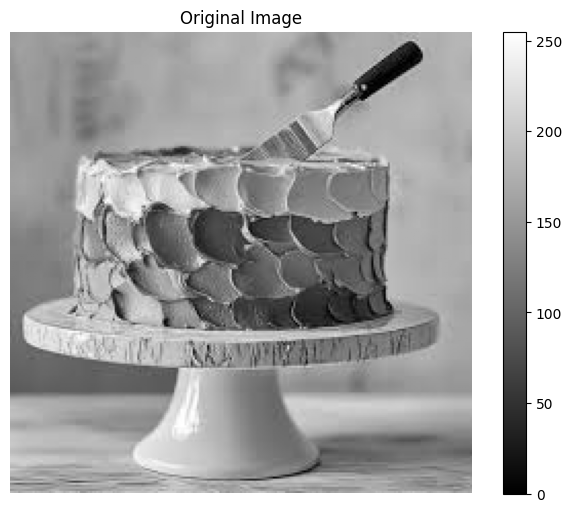

In [2]:
# Load the input image
image_path = 'images.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print(f"Error: Could not load image from {image_path}")
else:
    print(f"Image loaded successfully! Shape: {img.shape}")
    
    # Display original image
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.colorbar()
    plt.axis('off')
    plt.show()

Task 1: Applying 2D FFT to decompose image into sine and cosine components
FFT Shape: (225, 225)
FFT is complex: True


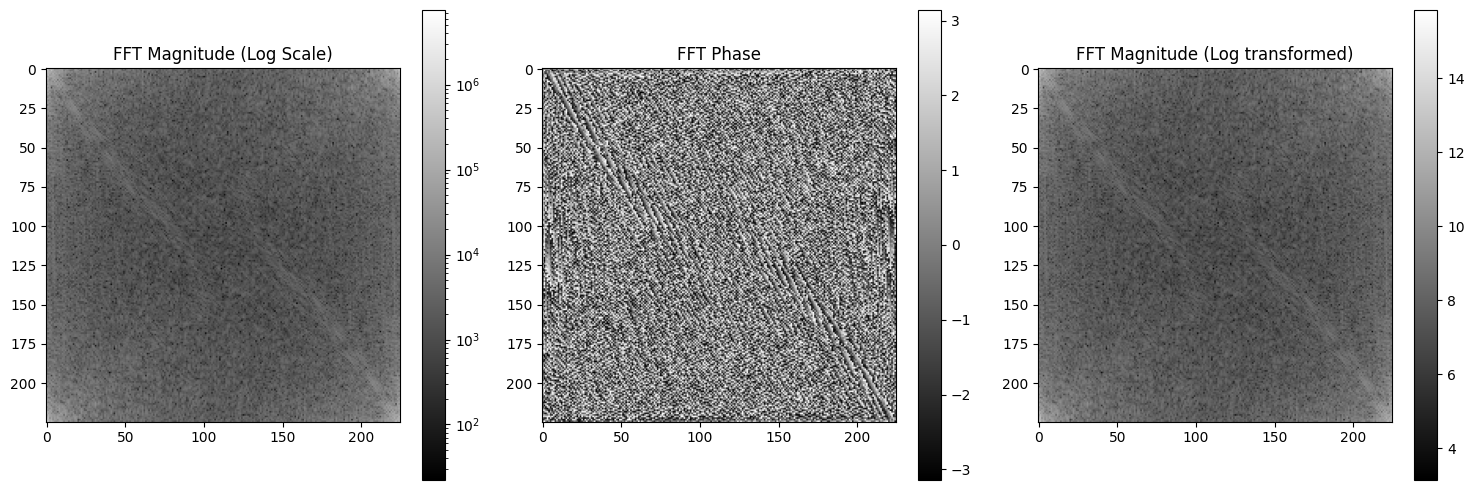

In [3]:
# Task 1: Apply 2D Fast Fourier Transform
print("Task 1: Applying 2D FFT to decompose image into sine and cosine components")

# Apply 2D FFT
fft = np.fft.fft2(img)
print(f"FFT Shape: {fft.shape}")
print(f"FFT is complex: {np.iscomplexobj(fft)}")

# Calculate magnitude and phase
magnitude = np.abs(fft)
phase = np.angle(fft)

# Display FFT results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(magnitude, cmap='gray', norm=LogNorm())
plt.title('FFT Magnitude (Log Scale)')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(phase, cmap='gray')
plt.title('FFT Phase')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(np.log(magnitude + 1), cmap='gray')
plt.title('FFT Magnitude (Log transformed)')
plt.colorbar()

plt.tight_layout()
plt.show()

Task 2: Shifting low frequencies to center


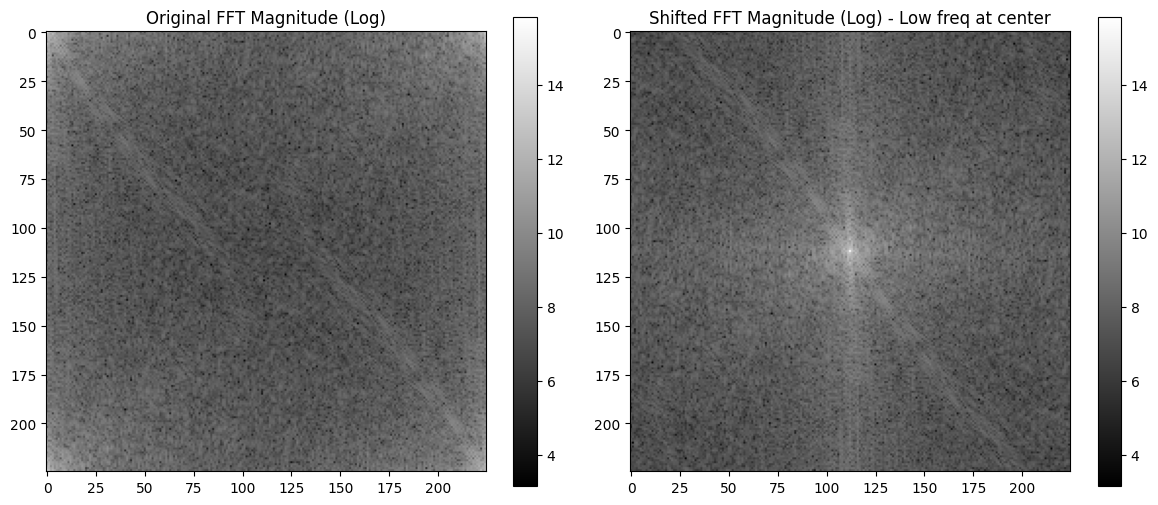

Low frequency components are now at the center of the spectrum


In [4]:
# Task 2: Shift low frequency components to center and display Fourier spectrum
print("Task 2: Shifting low frequencies to center")

# Shift the zero frequency component to center
fft_shifted = np.fft.fftshift(fft)
magnitude_shifted = np.abs(fft_shifted)

# Display shifted FFT spectrum
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.log(magnitude + 1), cmap='gray')
plt.title('Original FFT Magnitude (Log)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(np.log(magnitude_shifted + 1), cmap='gray')
plt.title('Shifted FFT Magnitude (Log) - Low freq at center')
plt.colorbar()

plt.tight_layout()
plt.show()

print("Low frequency components are now at the center of the spectrum")

Task 3: Creating Ideal Low Pass Filter


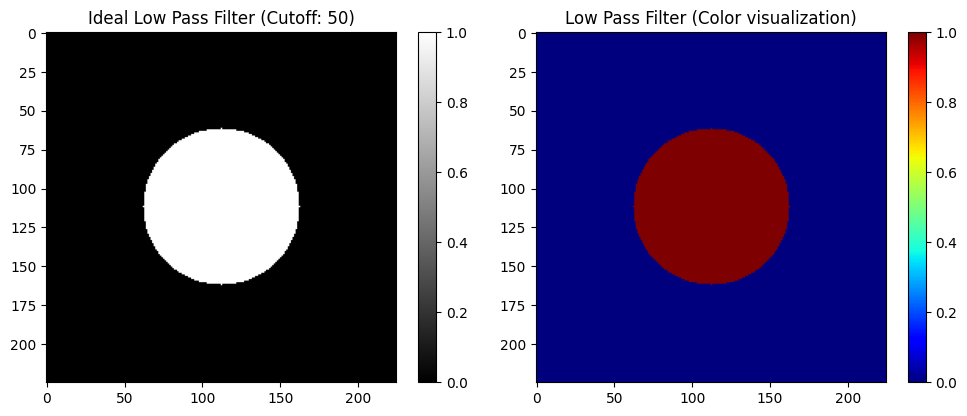

Low pass filter created with cutoff frequency: 50


In [5]:
# Task 3: Create Ideal Low Pass Filter
print("Task 3: Creating Ideal Low Pass Filter")

def create_ideal_lowpass_filter(shape, cutoff):
    """Create an ideal low pass filter"""
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    
    # Create coordinate matrices
    u = np.arange(rows) - center_row
    v = np.arange(cols) - center_col
    U, V = np.meshgrid(v, u)
    
    # Calculate distance from center
    D = np.sqrt(U**2 + V**2)
    
    # Create ideal low pass filter
    H = np.zeros((rows, cols))
    H[D <= cutoff] = 1
    
    return H

# Create low pass filter with cutoff frequency
cutoff_freq = 50  # Adjust this value as needed
lowpass_filter = create_ideal_lowpass_filter(img.shape, cutoff_freq)

# Display the filter
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(lowpass_filter, cmap='gray')
plt.title(f'Ideal Low Pass Filter (Cutoff: {cutoff_freq})')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(lowpass_filter, cmap='jet')
plt.title('Low Pass Filter (Color visualization)')
plt.colorbar()

plt.tight_layout()
plt.show()

print(f"Low pass filter created with cutoff frequency: {cutoff_freq}")

Task 4: Applying Low Pass Filter to get smoothed image


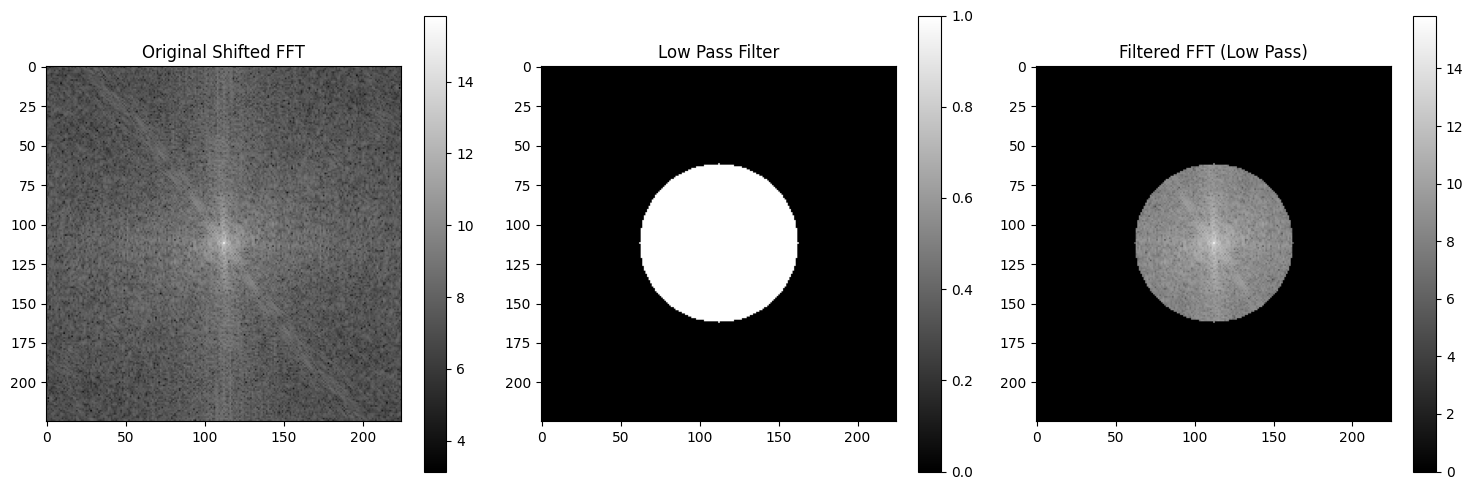

In [6]:
# Task 4: Apply Low Pass Filter and get smoothed image
print("Task 4: Applying Low Pass Filter to get smoothed image")

# Apply low pass filter to shifted FFT
filtered_fft_lowpass = fft_shifted * lowpass_filter

# Display filtered spectrum
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.log(magnitude_shifted + 1), cmap='gray')
plt.title('Original Shifted FFT')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(lowpass_filter, cmap='gray')
plt.title('Low Pass Filter')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(np.log(np.abs(filtered_fft_lowpass) + 1), cmap='gray')
plt.title('Filtered FFT (Low Pass)')
plt.colorbar()

plt.tight_layout()
plt.show()

In [7]:
# Task 5: Decentralize frequency components (Low Pass)
print("Task 5: Decentralizing frequency components for Low Pass")

# Shift back to original position (decentralize)
filtered_fft_lowpass_unshifted = np.fft.ifftshift(filtered_fft_lowpass)

print("Low pass filtered FFT has been decentralized")

Task 5: Decentralizing frequency components for Low Pass
Low pass filtered FFT has been decentralized


Task 6: Applying Inverse FFT to restore smoothed image


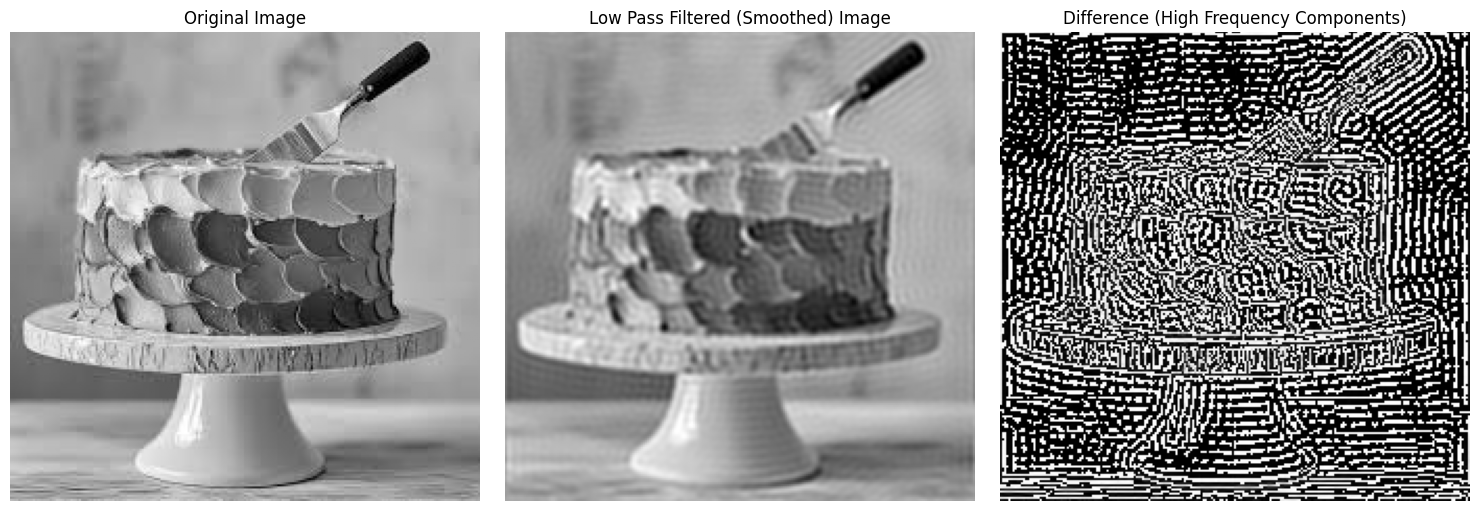

Low pass filtering completed - image is smoothed (high frequencies removed)


In [8]:
# Task 6: Apply Inverse FFT to restore image (Low Pass)
print("Task 6: Applying Inverse FFT to restore smoothed image")

# Apply inverse FFT
restored_img_lowpass = np.fft.ifft2(filtered_fft_lowpass_unshifted)
restored_img_lowpass = np.real(restored_img_lowpass)  # Take real part
restored_img_lowpass = np.uint8(np.clip(restored_img_lowpass, 0, 255))

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(restored_img_lowpass, cmap='gray')
plt.title('Low Pass Filtered (Smoothed) Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img - restored_img_lowpass, cmap='gray')
plt.title('Difference (High Frequency Components)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Low pass filtering completed - image is smoothed (high frequencies removed)")

Task 7: Creating Ideal High Pass Filter


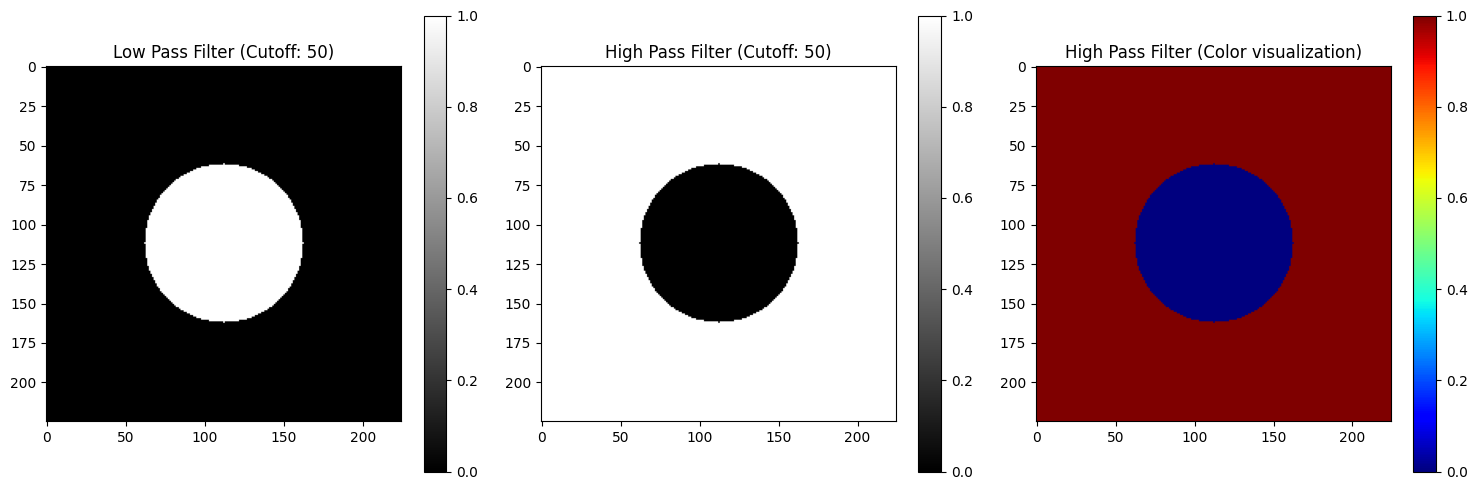

High pass filter created with cutoff frequency: 50


In [9]:
# Task 7: Create Ideal High Pass Filter
print("Task 7: Creating Ideal High Pass Filter")

def create_ideal_highpass_filter(shape, cutoff):
    """Create an ideal high pass filter"""
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    
    # Create coordinate matrices
    u = np.arange(rows) - center_row
    v = np.arange(cols) - center_col
    U, V = np.meshgrid(v, u)
    
    # Calculate distance from center
    D = np.sqrt(U**2 + V**2)
    
    # Create ideal high pass filter (opposite of low pass)
    H = np.ones((rows, cols))
    H[D <= cutoff] = 0
    
    return H

# Create high pass filter with same cutoff frequency
highpass_filter = create_ideal_highpass_filter(img.shape, cutoff_freq)

# Display the filter
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(lowpass_filter, cmap='gray')
plt.title(f'Low Pass Filter (Cutoff: {cutoff_freq})')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(highpass_filter, cmap='gray')
plt.title(f'High Pass Filter (Cutoff: {cutoff_freq})')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(highpass_filter, cmap='jet')
plt.title('High Pass Filter (Color visualization)')
plt.colorbar()

plt.tight_layout()
plt.show()

print(f"High pass filter created with cutoff frequency: {cutoff_freq}")

Task 8: Applying High Pass Filter to detect edges


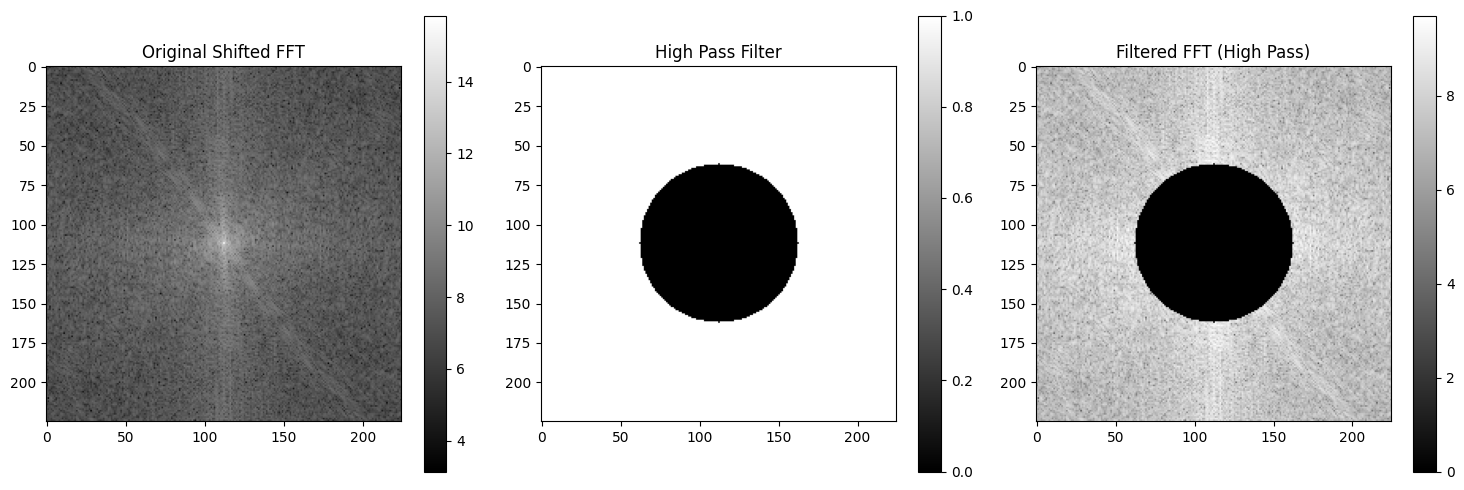

In [10]:
# Task 8: Apply High Pass Filter for Edge Detection
print("Task 8: Applying High Pass Filter to detect edges")

# Apply high pass filter to shifted FFT
filtered_fft_highpass = fft_shifted * highpass_filter

# Display filtered spectrum
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.log(magnitude_shifted + 1), cmap='gray')
plt.title('Original Shifted FFT')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(highpass_filter, cmap='gray')
plt.title('High Pass Filter')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(np.log(np.abs(filtered_fft_highpass) + 1), cmap='gray')
plt.title('Filtered FFT (High Pass)')
plt.colorbar()

plt.tight_layout()
plt.show()

In [11]:
# Task 9: Decentralize frequency components (High Pass)
print("Task 9: Decentralizing frequency components for High Pass")

# Shift back to original position (decentralize)
filtered_fft_highpass_unshifted = np.fft.ifftshift(filtered_fft_highpass)

print("High pass filtered FFT has been decentralized")

Task 9: Decentralizing frequency components for High Pass
High pass filtered FFT has been decentralized


Task 10: Applying Inverse FFT to get edge-detected image


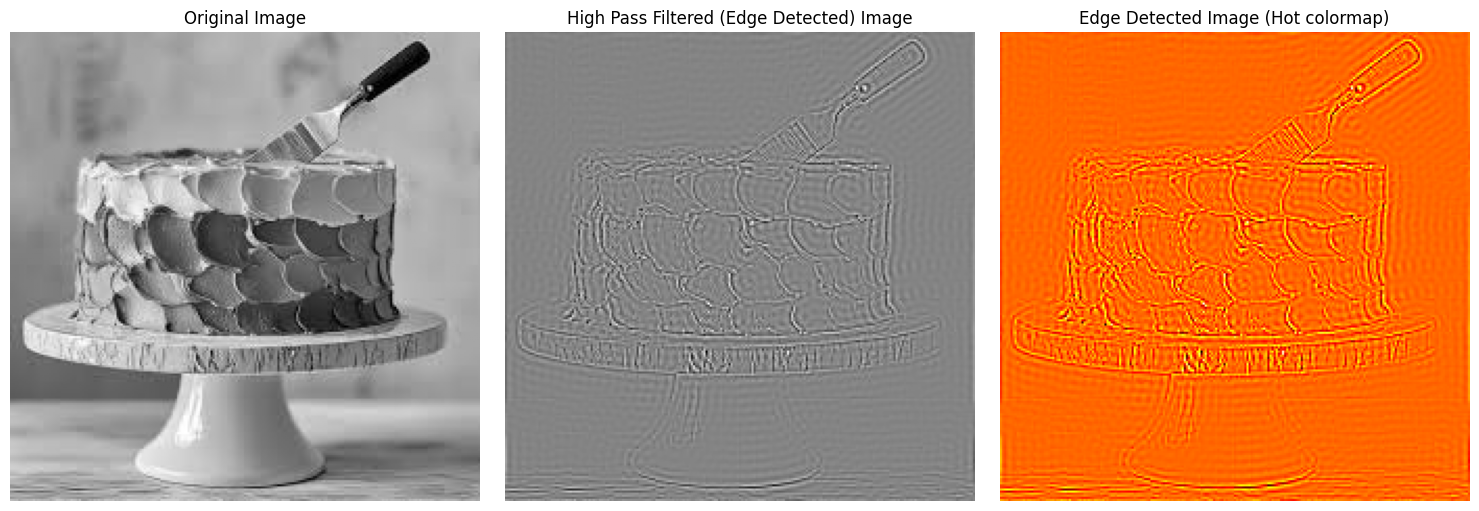

High pass filtering completed - edges are detected (low frequencies removed)


In [12]:
# Task 10: Apply Inverse FFT to restore image (High Pass - Edge Detection)
print("Task 10: Applying Inverse FFT to get edge-detected image")

# Apply inverse FFT
restored_img_highpass = np.fft.ifft2(filtered_fft_highpass_unshifted)
restored_img_highpass = np.real(restored_img_highpass)  # Take real part

# Normalize for better visualization
restored_img_highpass = restored_img_highpass - np.min(restored_img_highpass)
restored_img_highpass = restored_img_highpass / np.max(restored_img_highpass) * 255
restored_img_highpass = np.uint8(restored_img_highpass)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(restored_img_highpass, cmap='gray')
plt.title('High Pass Filtered (Edge Detected) Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(restored_img_highpass, cmap='hot')
plt.title('Edge Detected Image (Hot colormap)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("High pass filtering completed - edges are detected (low frequencies removed)")

SUMMARY: Comparison of Original, Low Pass, and High Pass filtered images


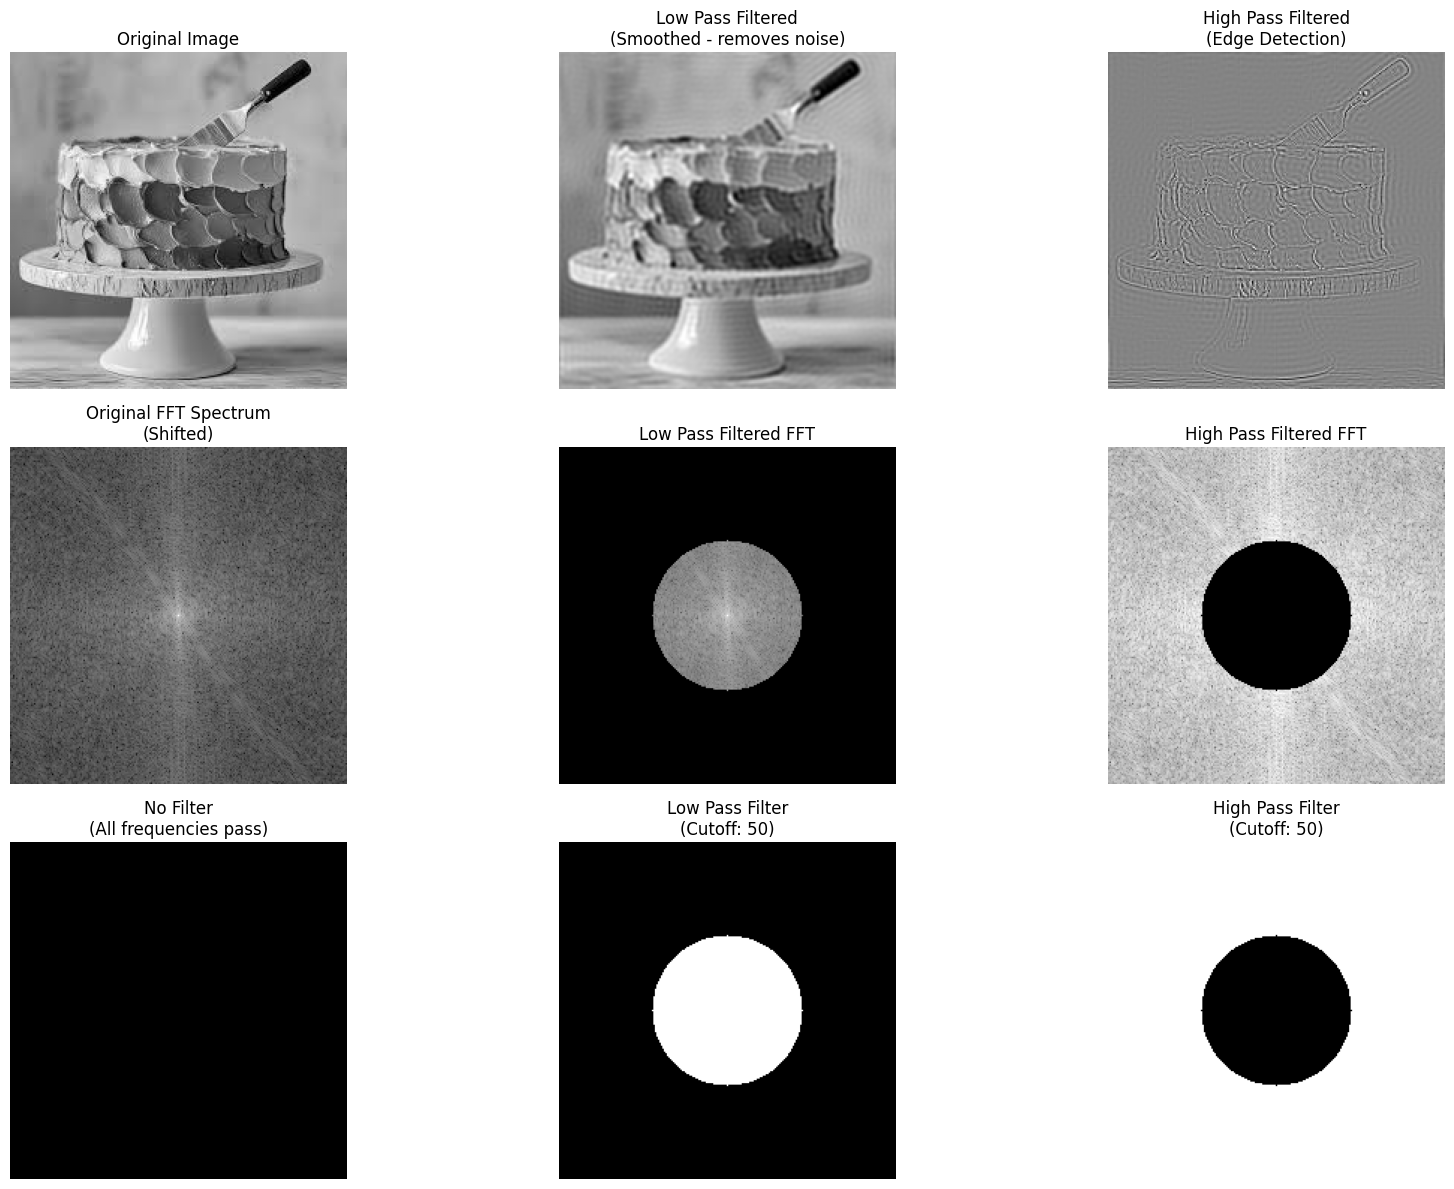


LAB 4 COMPLETED SUCCESSFULLY!
Tasks completed:
1. ✓ Applied 2D FFT to decompose image into frequency components
2. ✓ Shifted low frequencies to center
3. ✓ Created Ideal Low Pass Filter
4. ✓ Applied Low Pass Filter for image smoothing
5. ✓ Decentralized frequency components (Low Pass)
6. ✓ Applied Inverse FFT to restore smoothed image
7. ✓ Created Ideal High Pass Filter
8. ✓ Applied High Pass Filter for edge detection
9. ✓ Decentralized frequency components (High Pass)
10. ✓ Applied Inverse FFT to restore edge-detected image


In [13]:
# Summary: Comparison of all results
print("SUMMARY: Comparison of Original, Low Pass, and High Pass filtered images")

plt.figure(figsize=(18, 12))

# Row 1: Original and reconstructed images
plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(restored_img_lowpass, cmap='gray')
plt.title('Low Pass Filtered\n(Smoothed - removes noise)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(restored_img_highpass, cmap='gray')
plt.title('High Pass Filtered\n(Edge Detection)')
plt.axis('off')

# Row 2: Frequency domain representations
plt.subplot(3, 3, 4)
plt.imshow(np.log(magnitude_shifted + 1), cmap='gray')
plt.title('Original FFT Spectrum\n(Shifted)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(np.log(np.abs(filtered_fft_lowpass) + 1), cmap='gray')
plt.title('Low Pass Filtered FFT')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(np.log(np.abs(filtered_fft_highpass) + 1), cmap='gray')
plt.title('High Pass Filtered FFT')
plt.axis('off')

# Row 3: Filters used
plt.subplot(3, 3, 7)
plt.imshow(np.ones_like(lowpass_filter), cmap='gray')
plt.title('No Filter\n(All frequencies pass)')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(lowpass_filter, cmap='gray')
plt.title(f'Low Pass Filter\n(Cutoff: {cutoff_freq})')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(highpass_filter, cmap='gray')
plt.title(f'High Pass Filter\n(Cutoff: {cutoff_freq})')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("LAB 4 COMPLETED SUCCESSFULLY!")
print("="*60)
print("Tasks completed:")
print("1. ✓ Applied 2D FFT to decompose image into frequency components")
print("2. ✓ Shifted low frequencies to center")
print("3. ✓ Created Ideal Low Pass Filter")
print("4. ✓ Applied Low Pass Filter for image smoothing")
print("5. ✓ Decentralized frequency components (Low Pass)")
print("6. ✓ Applied Inverse FFT to restore smoothed image")
print("7. ✓ Created Ideal High Pass Filter")
print("8. ✓ Applied High Pass Filter for edge detection")
print("9. ✓ Decentralized frequency components (High Pass)")
print("10. ✓ Applied Inverse FFT to restore edge-detected image")
print("="*60)